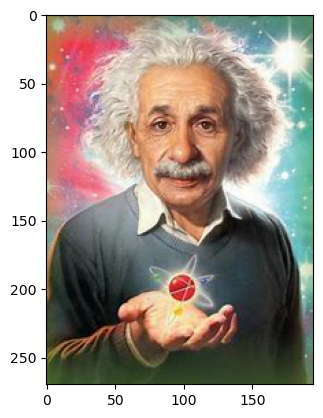

In [8]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('image/work2.jpg')
# cv2的imread默认存储的颜色顺序为BGR，转换成正常颜色
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
# 查看原图
plt.imshow(img)

In [9]:
# 查看图片尺寸
img.shape

(270, 195, 3)

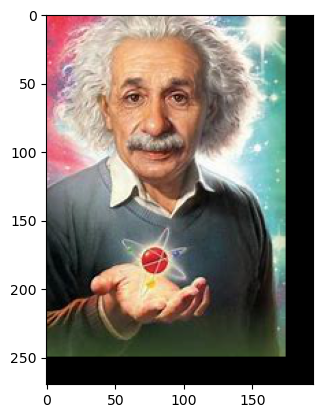

In [10]:
'''
    任务一：图片平移
'''
# 定义平移矩阵，左上平移（20,20）
delta_x = 20 # 左移20像素
delta_y = 20 # 下移20像素
img_move = np.array([[1,0,delta_x],
                    [0,1,delta_y],
                    [0,0,1]])
# 变换后的图片
img_change = np.zeros_like(img)
# 平移几何运算
for row in range(img.shape[0]):
    for col in range(img.shape[1]):
        # 当前像素点矩阵
        pos = np.array([row,col,1])
        # 点乘
        [x,y,z] = np.dot(img_move,pos)
        # 边界外点的处理
        if x>=img.shape[0] or y>=img.shape[1] or x<0 or y<0:
            img_change[row][col] = 0
        else:
            img_change[row][col] = img[x][y]
# 查看平移后的图像
plt.imshow(img_change)

Text(0.5, 1.0, 'Changed Image')

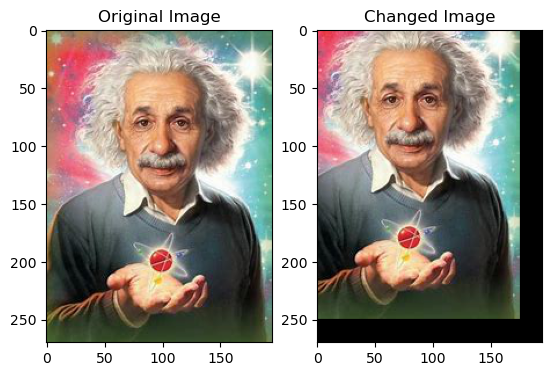

In [11]:
# 平移前后图像对比
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(img_change)
plt.title('Changed Image')

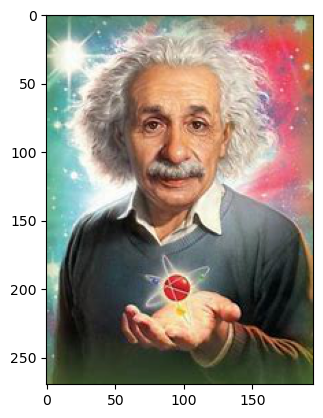

In [20]:
'''
    任务二：图像镜像
'''
# 垂直镜像（x轴）矩阵
img_mirror_x = np.array([[-1,0,img.shape[0]-1],
                         [0,1,0],
                         [0,0,1]])
# 垂直镜像(x轴)矩阵
img_mirror_y = np.array([[1,0,0],
                        [0,-1,img.shape[1]-1],
                        [0,0,1]])
# 变换后的图片
img_change_x = np.zeros_like(img)
img_change_y = np.zeros_like(img)
# 镜像几何计算
for row in range(img.shape[0]):
    for col in range(img.shape[1]):
        # 当前像素点矩阵
        pos = np.array([row,col,1])
        # 点乘
        [x,y,z] = np.dot(img_mirror_y,pos)
        img_change_y[row][col] = img[x][y]
        [x,y,z] = np.dot(img_mirror_x,pos)
        img_change_x[row][col] = img[x][y]
# 查看镜像后图片
# plt.imshow(img)
plt.imshow(img_change_y)

Text(0.5, 1.0, 'Mirror_y')

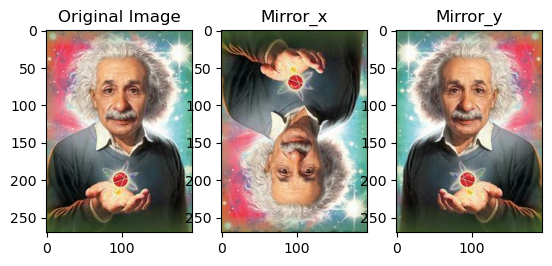

In [21]:
# 镜像处理前后图片对比
plt.figure()
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title('Original Image')
plt.subplot(1, 3, 2)
plt.imshow(img_change_x)
plt.title('Mirror_x')
plt.subplot(1, 3, 3)
plt.imshow(img_change_y)
plt.title('Mirror_y')

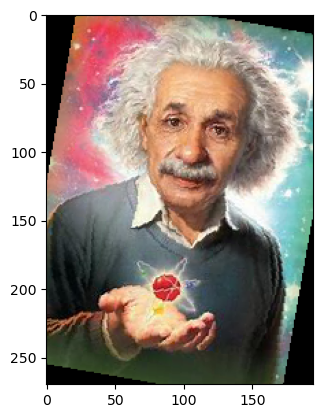

In [38]:
'''
    任务三：图像旋转
'''
# 旋转10度，以中心点为原点
beta = math.radians(10)
center = [int(img.shape[0]/2),int(img.shape[1]/2)]
# 旋转矩阵
img_rotation = np.array([[math.cos(beta),-math.sin(beta),0],
                        [math.sin(beta),math.cos(beta),0],
                        [0,0,1]])
# 变换后的图片
img_change = np.zeros_like(img)
# 平移几何运算
for row in range(img.shape[0]):
    for col in range(img.shape[1]):
        # 当前像素点矩阵
        pos = np.array([row-center[0],col-center[1],1])
        # 点乘
        [x,y,z] = np.dot(img_rotation,pos)
        x = int(x)+center[0]
        y = int(y)+center[1]
        # 边界外点的处理
        if x>=img.shape[0] or y>=img.shape[1] or x<0 or y<0:
            img_change[row][col] = 0
        else:
            img_change[row][col] = img[x][y]
# 查看图片
plt.imshow(img_change)

Text(0.5, 1.0, 'Chaged Image')

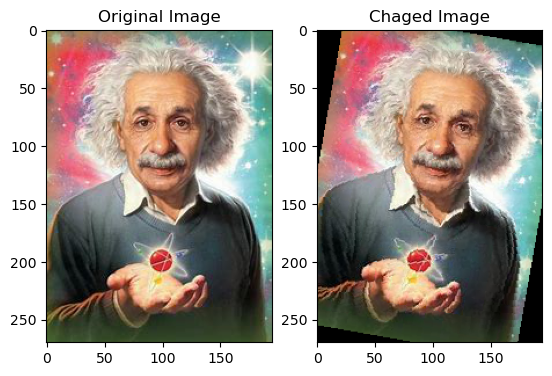

In [39]:
# # 旋转处理前后图片对比
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(img_change)
plt.title('Chaged Image')